In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import the required packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# read the file 
car = pd.read_csv ("../input/CarPrice.csv")


# Data Cleaning and Validation for the Input Dataset

In [4]:
new = car["CarName"].str.split(" ", n=1,expand = True)  
car["Carname"]= new[0]

In [5]:
car.drop(['CarName'], axis=1).head()

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Carname
0,1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,2,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,3,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,4,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,5,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


# Peforming EDA analysis

In [6]:
car.shape

(205, 27)

In [7]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 27 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

In [8]:
car.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

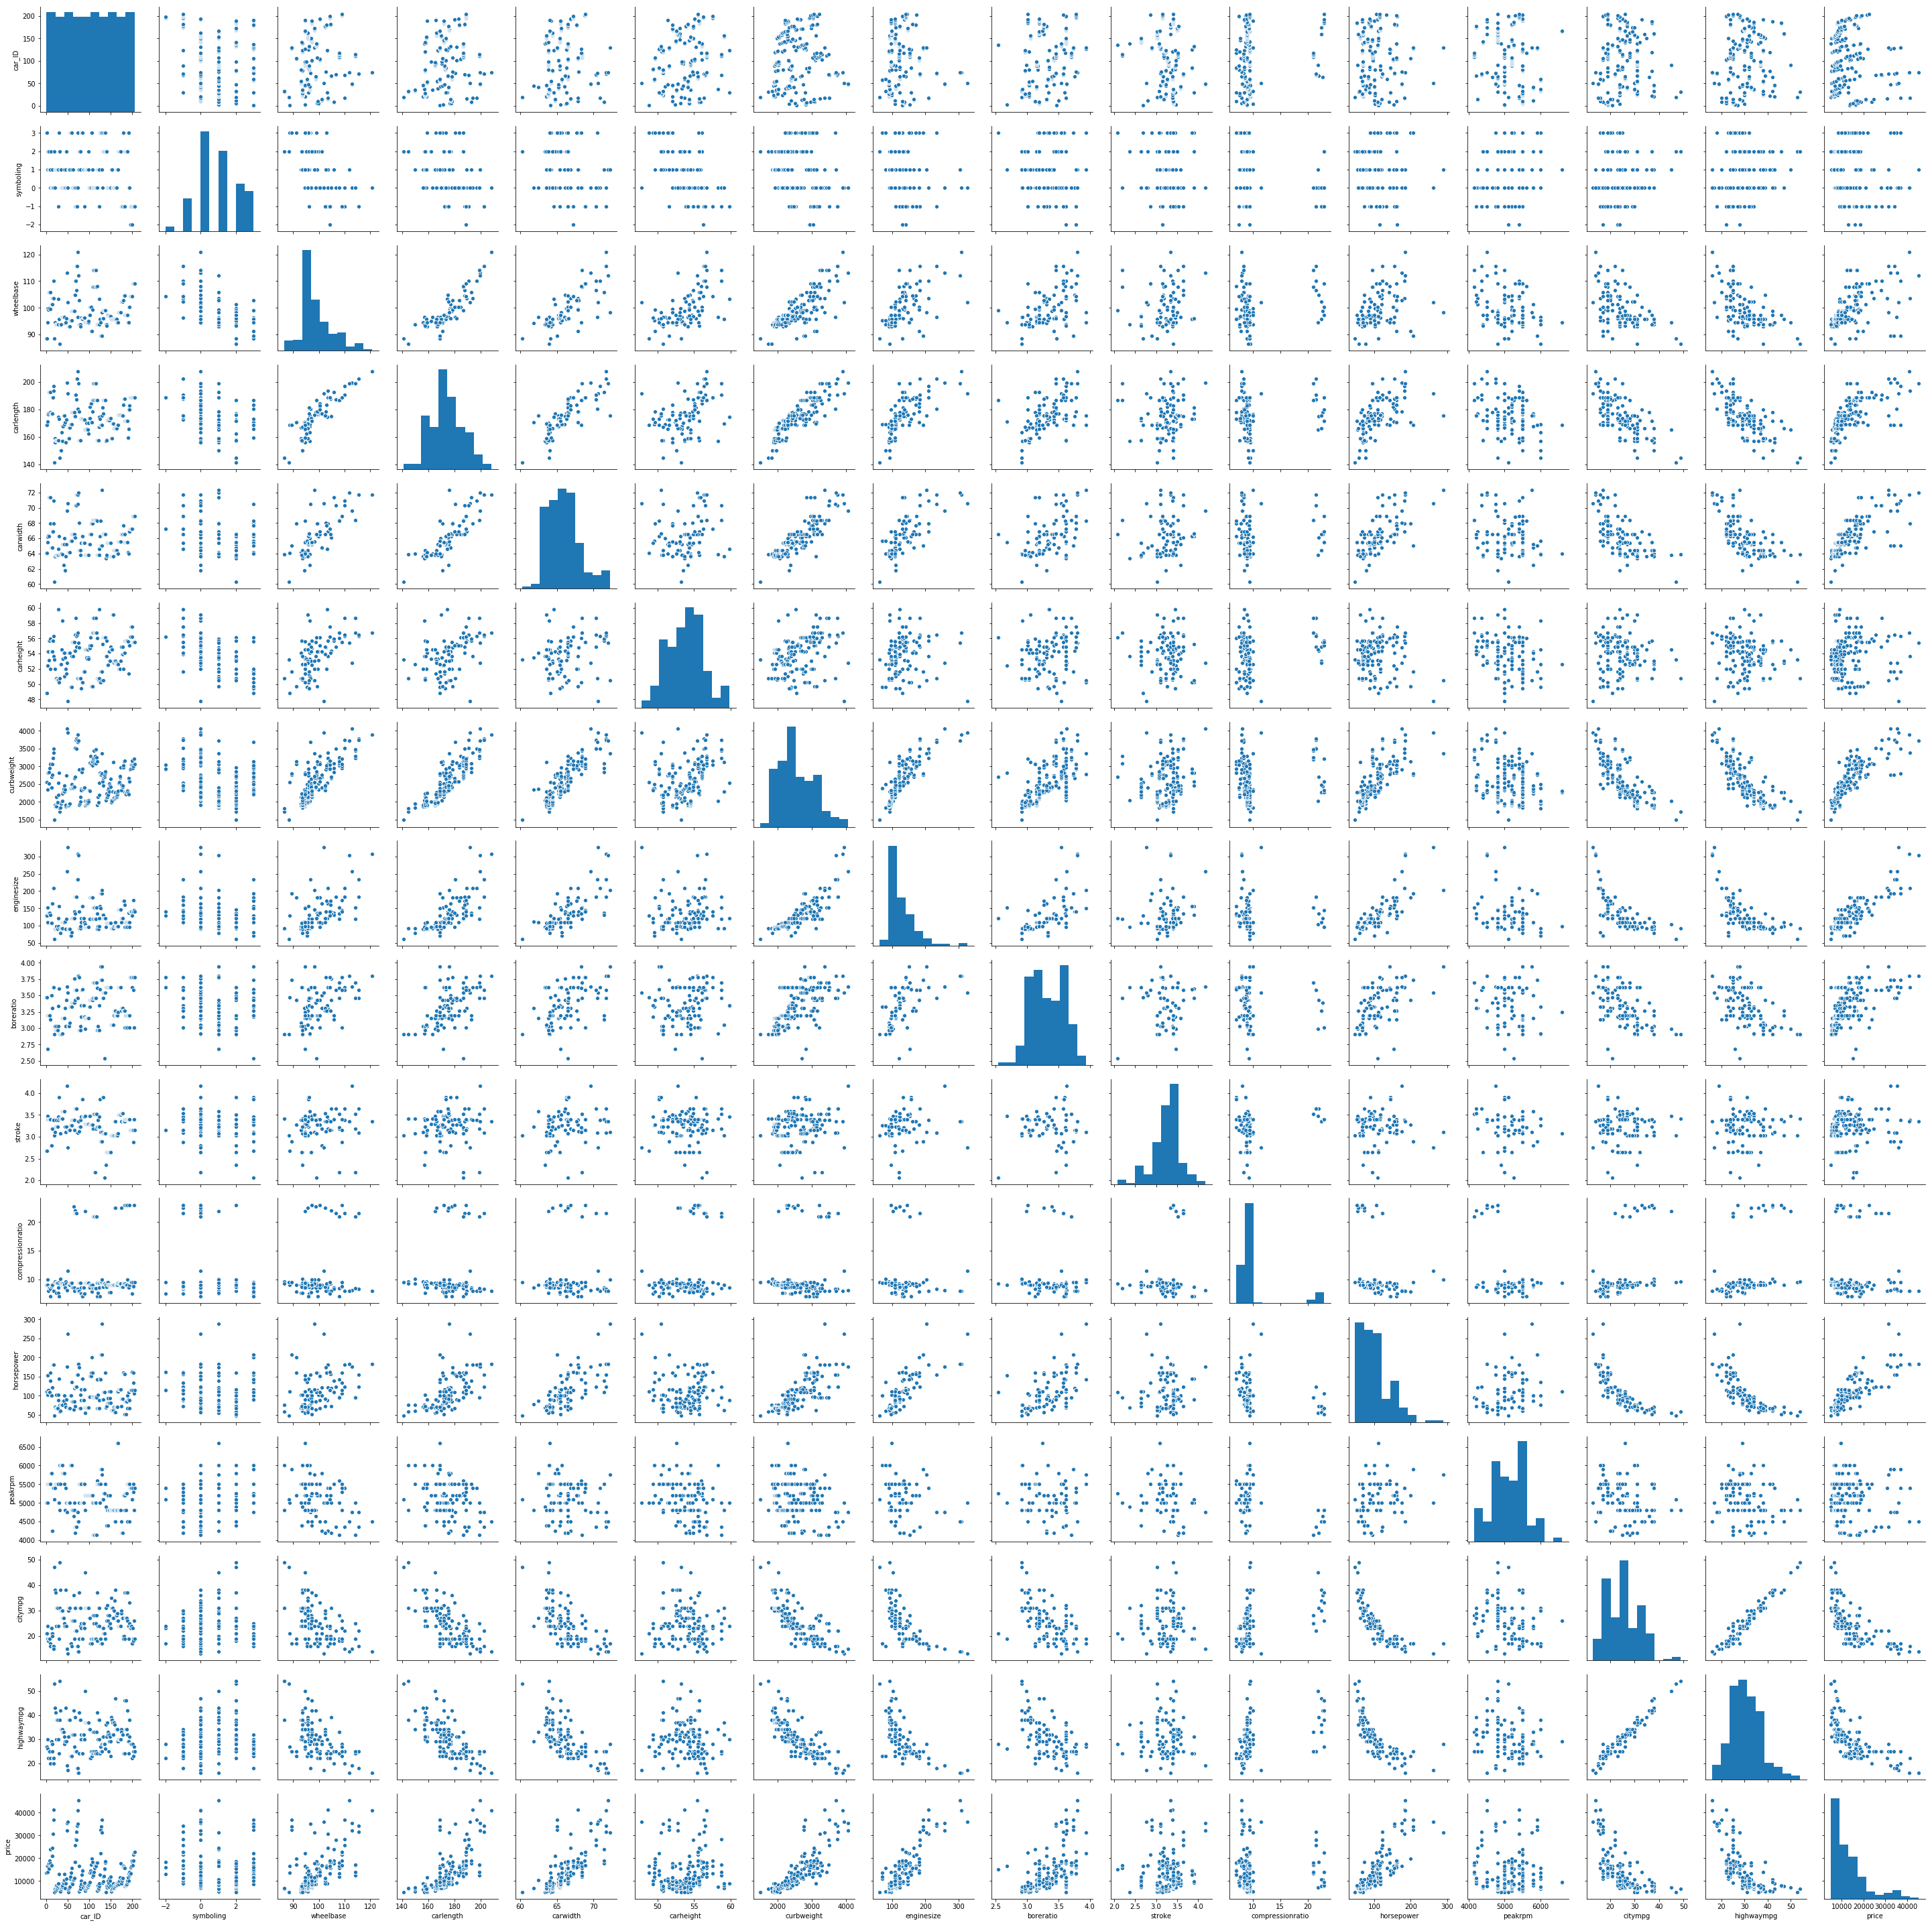

In [10]:
sns.pairplot(car)
plt.show()

In [11]:
# Dropping car Name after taking Car Company name and ignore the car model
car.drop(['CarName'], axis = 1, inplace = True)

###  Creating Dummy variables and Transforming Categorical variables

In [12]:
varlist =  ['fueltype']

# Defining the map function
def binary_map(x):
    return x.map({"gas": 1, "diesel": 0})

# Applying the function to the car list
car[varlist] = car[varlist].apply(binary_map)

In [13]:
varlist =  ['aspiration']

# Defining the map function
def binary_map(x):
    return x.map({"std": 1, "turbo": 0})

# Applying the function to the car list
car[varlist] = car[varlist].apply(binary_map)

In [14]:
varlist =  ['doornumber']

# Defining the map function
def binary_map(x):
    return x.map({"two": 1, "four": 0})

# Applying the function to the car list
car[varlist] = car[varlist].apply(binary_map)

In [15]:
varlist =  ['enginelocation']

# Defining the map function
def binary_map(x):
    return x.map({"front": 1, "rear": 0})

# Applying the function to the car list
car[varlist] = car[varlist].apply(binary_map)

In [16]:
# Get the dummy variables for the feature 'carbody' and store it in a new variable - 'car_dm'
car_dm = pd.get_dummies(car['carbody'])

In [17]:
# Let's drop the first column from status df using 'drop_first = True'

car_dm = pd.get_dummies(car['carbody'], drop_first = True)

In [18]:
# Add the results to the original car dataframe

car = pd.concat([car, car_dm], axis = 1)

In [19]:
# Drop 'carbody' as we have created the dummies for it

car.drop(['carbody'], axis = 1, inplace = True)

In [20]:
# Get the dummy variables for the feature 'drivewheel' and store it in a new variable - 'car_dm'
car_dm = pd.get_dummies(car['drivewheel'])

In [21]:
car_dm.head()


,4wd,fwd,rwd
0,0,0,1
1,0,0,1
2,0,0,1
3,0,1,0
4,1,0,0


In [22]:
# Let's drop the first column from status df using 'drop_first = True'

car_dm1 = pd.get_dummies(car['drivewheel'], drop_first = True)

In [23]:
# Add the results to the original car dataframe

car = pd.concat([car, car_dm1], axis = 1)

In [24]:
# Drop 'drivewheel' as we have created the dummies for it

car.drop(['drivewheel'], axis = 1, inplace = True)

In [25]:
# Get the dummy variables for the feature 'enginetype' and store it in a new variable - 'car_dm'
car_dm = pd.get_dummies(car['enginetype'])

In [26]:
car_dm.head()

,dohc,dohcv,l,ohc,ohcf,ohcv,rotor
0,1,0,0,0,0,0,0
1,1,0,0,0,0,0,0
2,0,0,0,0,0,1,0
3,0,0,0,1,0,0,0
4,0,0,0,1,0,0,0


In [27]:
# Let's drop the first column from status df using 'drop_first = True'

car_dm = pd.get_dummies(car['enginetype'], drop_first = True)

In [28]:
# Add the results to the original housing dataframe

car = pd.concat([car, car_dm], axis = 1)

In [29]:
# Drop 'enginetype' as we have created the dummies for it

car.drop(['enginetype'], axis = 1, inplace = True)

In [30]:

# Get the dummy variables for the feature 'cylindernumber' and store it in a new variable - 'car_dm'
car_dm = pd.get_dummies(car['cylindernumber'])

In [31]:
# Let's drop the first column from status df using 'drop_first = True'

car_dm = pd.get_dummies(car['cylindernumber'], drop_first = True)

In [32]:
# Add the results to the original car dataframe

car = pd.concat([car, car_dm], axis = 1)

In [33]:
# Drop 'cylindernumber' as we have created the dummies for it

car.drop(['cylindernumber'], axis = 1, inplace = True)

In [34]:
# Get the dummy variables for the feature 'fuelsystem' and store it in a new variable - 'car_dm'
car_dm = pd.get_dummies(car['fuelsystem'])


In [35]:
# Let's drop the first column from status df using 'drop_first = True'

car_dm = pd.get_dummies(car['fuelsystem'], drop_first = True)

In [36]:

# Add the results to the original car dataframe

car = pd.concat([car, car_dm], axis = 1)

In [37]:
# Drop 'fuelsystem' as we have created the dummies for it

car.drop(['fuelsystem'], axis = 1, inplace = True)


In [38]:
car.drop(['car_ID'], axis = 1, inplace = True)

In [39]:
# Get the dummy variables for the feature 'Carname' and store it in a new variable - 'car_dm'
car_dm = pd.get_dummies(car['Carname'])


In [40]:
# Let's drop the first column from status df using 'drop_first = True'

car_dm = pd.get_dummies(car['Carname'], drop_first = True)

In [41]:

# Add the results to the original car dataframe

car = pd.concat([car, car_dm], axis = 1)

In [42]:
# Drop 'carbody' as we have created the dummies for it

car.drop(['Carname'], axis = 1, inplace = True)


In [43]:
car.head()

,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,hardtop,hatchback,sedan,wagon,fwd,rwd,dohcv,l,ohc,ohcf,ohcv,rotor,five,four,six,three,twelve,two,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi,alfa-romero,audi,bmw,buick,chevrolet,dodge,honda,isuzu,jaguar,maxda,mazda,mercury,mitsubishi,nissan,peugeot,plymouth,porcshce,porsche,renault,saab,subaru,toyota,toyouta,vokswagen,volkswagen,volvo,vw
0,3,1,1,1,1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,3,1,1,1,1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,1,1,1,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2,1,1,0,1,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2,1,1,0,1,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


#### Split datasets Train and Test 

In [44]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(car, train_size = 0.7, test_size = 0.3, random_state = 100)

In [45]:
from sklearn.preprocessing import MinMaxScaler

In [46]:
scaler = MinMaxScaler()

In [47]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight','curbweight','enginesize','boreratio','stroke','compressionratio'
           ,'horsepower','peakrpm','citympg','highwaympg','price']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [48]:
y_train = df_train.pop('price')
X_train = df_train

In [49]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [50]:
# Running RFE with the output number of the variable equal to 70
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 70)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [51]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('symboling', True, 1),
 ('fueltype', True, 1),
 ('aspiration', True, 1),
 ('doornumber', True, 1),
 ('enginelocation', True, 1),
 ('wheelbase', True, 1),
 ('carlength', True, 1),
 ('carwidth', True, 1),
 ('carheight', True, 1),
 ('curbweight', True, 1),
 ('enginesize', True, 1),
 ('boreratio', True, 1),
 ('stroke', True, 1),
 ('compressionratio', True, 1),
 ('horsepower', True, 1),
 ('peakrpm', True, 1),
 ('citympg', True, 1),
 ('highwaympg', True, 1),
 ('hardtop', True, 1),
 ('hatchback', True, 1),
 ('sedan', True, 1),
 ('wagon', True, 1),
 ('fwd', True, 1),
 ('rwd', True, 1),
 ('dohcv', True, 1),
 ('l', True, 1),
 ('ohc', True, 1),
 ('ohcf', True, 1),
 ('ohcv', True, 1),
 ('rotor', True, 1),
 ('five', True, 1),
 ('four', True, 1),
 ('six', True, 1),
 ('three', True, 1),
 ('twelve', True, 1),
 ('two', True, 1),
 ('2bbl', True, 1),
 ('4bbl', True, 1),
 ('idi', True, 1),
 ('mfi', True, 1),
 ('mpfi', True, 1),
 ('spdi', True, 1),
 ('spfi', True, 1),
 ('alfa-romero', True, 1),
 ('audi',

In [52]:
# RFE NOT SATISFIED VARIables

col = X_train.columns[rfe.support_]
col

Index(['symboling', 'fueltype', 'aspiration', 'doornumber', 'enginelocation',
       'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'hardtop', 'hatchback', 'sedan',
       'wagon', 'fwd', 'rwd', 'dohcv', 'l', 'ohc', 'ohcf', 'ohcv', 'rotor',
       'five', 'four', 'six', 'three', 'twelve', 'two', '2bbl', '4bbl', 'idi',
       'mfi', 'mpfi', 'spdi', 'spfi', 'alfa-romero', 'audi', 'bmw', 'buick',
       'chevrolet', 'dodge', 'honda', 'isuzu', 'jaguar', 'maxda', 'mazda',
       'mercury', 'mitsubishi', 'nissan', 'peugeot', 'plymouth', 'porcshce',
       'porsche', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'volvo', 'vw'],
      dtype='object')

In [53]:
X_train.columns[~rfe.support_]

Index([], dtype='object')

In [54]:
# Creating X_train_rfe dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [55]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [56]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [57]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.975
Model:                            OLS   Adj. R-squared:                  0.956
Method:                 Least Squares   F-statistic:                     51.79
Date:                Fri, 26 Apr 2019   Prob (F-statistic):           3.00e-46
Time:                        19:04:07   Log-Likelihood:                 280.71
No. Observations:                 143   AIC:                            -437.4
Df Residuals:                      81   BIC:                            -253.7
Df Model:                          61                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0195      0.132  

In [58]:
# drop NAN and typo variables 

X_train_new = X_train_rfe.drop(["volkswagen","vokswagen","toyouta","toyota"], axis = 1)


In [59]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [60]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
34,three,inf
2,fueltype,inf
26,l,inf
39,idi,inf
5,enginelocation,inf
64,subaru,inf
30,rotor,inf
58,peugeot,inf
36,two,inf
28,ohcf,inf


In [61]:
# Drop VIF > 5 impacted variables

X_train_new = X_train_new.drop(["rotor","l","fueltype","peugeot","idi","enginelocation","two","three","subaru","ohcf","four"
                               ,"enginesize","compressionratio","six","five","boreratio","horsepower","mpfi","citympg","curbweight"
                               ,"highwaympg","2bbl","sedan","hatchback","ohc","carlength","wheelbase","carwidth","wagon","rwd"], axis = 1)

In [62]:
# Adding a constant variable and re-run the model
import statsmodels.api as sm  
X_train_lm_n = sm.add_constant(X_train_new)

In [63]:
lm = sm.OLS(y_train,X_train_lm_n).fit()   # Running the linear model

In [64]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                     27.40
Date:                Fri, 26 Apr 2019   Prob (F-statistic):           4.97e-39
Time:                        19:04:07   Log-Likelihood:                 173.82
No. Observations:                 143   AIC:                            -281.6
Df Residuals:                     110   BIC:                            -183.9
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.1965      0.064      3.048      

In [65]:
X_train_lm_n.columns

Index(['const', 'symboling', 'aspiration', 'doornumber', 'carheight', 'stroke',
       'peakrpm', 'hardtop', 'fwd', 'dohcv', 'ohcv', 'twelve', '4bbl', 'mfi',
       'spdi', 'spfi', 'alfa-romero', 'audi', 'bmw', 'buick', 'chevrolet',
       'dodge', 'honda', 'isuzu', 'jaguar', 'maxda', 'mazda', 'mercury',
       'mitsubishi', 'nissan', 'plymouth', 'porcshce', 'porsche', 'renault',
       'saab', 'volvo', 'vw'],
      dtype='object')

In [66]:
# not variable which is not significant

X_train_new1 = X_train_lm_n.drop(["symboling"], axis = 1)

In [67]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X_train_new1.columns
vif['VIF'] = [variance_inflation_factor(X_train_new1.values, i) for i in range(X_train_new1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,62.85
3,carheight,3.02
27,mitsubishi,2.74
13,spdi,2.54
7,fwd,2.45
5,peakrpm,2.22
23,jaguar,2.22
21,honda,2.07
31,porsche,2.02
4,stroke,2.01


In [68]:
# Drop the variables which has VIF > 5 and re-run the model
X_train_new2 = X_train_new1.drop(["mfi","spfi","mercury","porcshce"], axis = 1)

In [69]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm_n2 = sm.add_constant(X_train_new2)

In [70]:
lm = sm.OLS(y_train,X_train_lm_n2).fit()   # Running the linear model

In [71]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.857
Method:                 Least Squares   F-statistic:                     28.54
Date:                Fri, 26 Apr 2019   Prob (F-statistic):           9.23e-40
Time:                        19:04:08   Log-Likelihood:                 173.82
No. Observations:                 143   AIC:                            -283.6
Df Residuals:                     111   BIC:                            -188.8
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.1997      0.054      3.699      

In [72]:
# Drop the variables which are not significant P values

X_train_new3 = X_train_lm_n2.drop(['spdi','vw','hardtop','maxda','mazda','twelve'], axis = 1)


In [73]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm_n3 = sm.add_constant(X_train_new3)

In [74]:
lm = sm.OLS(y_train,X_train_lm_n3).fit()   # Running the linear model

In [75]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     36.08
Date:                Fri, 26 Apr 2019   Prob (F-statistic):           1.26e-43
Time:                        19:04:08   Log-Likelihood:                 171.70
No. Observations:                 143   AIC:                            -291.4
Df Residuals:                     117   BIC:                            -214.4
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.2049      0.051      4.035      

In [76]:
# Drop variables which are not signicant > P > 0.05 
X_train_new4 = X_train_lm_n3.drop(['isuzu','renault','dohcv','4bbl','alfa-romero','chevrolet','nissan','peakrpm','honda',
                                   'doornumber','carheight','mitsubishi','plymouth','dodge'], axis = 1)

In [77]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm_n4 = sm.add_constant(X_train_new4)

In [78]:
lm = sm.OLS(y_train,X_train_lm_n4).fit()   # Running the linear model

In [79]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.857
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     71.25
Date:                Fri, 26 Apr 2019   Prob (F-statistic):           8.96e-50
Time:                        19:04:08   Log-Likelihood:                 155.91
No. Observations:                 143   AIC:                            -287.8
Df Residuals:                     131   BIC:                            -252.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1828      0.035      5.226      0.0

#### looks the model is good with Adjusted R Square , AIC, BIC all variavle significant . 

In [80]:
X_train_lm_n4.columns

Index(['const', 'aspiration', 'stroke', 'fwd', 'ohcv', 'audi', 'bmw', 'buick',
       'jaguar', 'porsche', 'saab', 'volvo'],
      dtype='object')

In [81]:
# Now predict the model on train dataset and do error residuals plot to test for idenpendence and normality 
y_train_price = lm.predict(X_train_lm_n4)

In [82]:
# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 0, 'Errors')

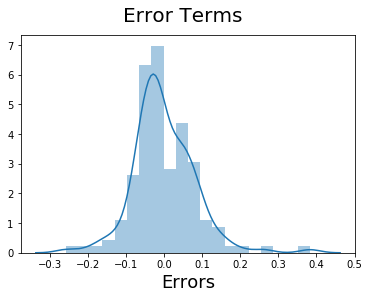

In [83]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

In [84]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight','curbweight','enginesize','boreratio','stroke','compressionratio'
           ,'horsepower','peakrpm','citympg','highwaympg','price']

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [85]:
y_test = df_test.pop('price')
X_test = df_test

In [86]:
X_train_lm_n4.columns

Index(['const', 'aspiration', 'stroke', 'fwd', 'ohcv', 'audi', 'bmw', 'buick',
       'jaguar', 'porsche', 'saab', 'volvo'],
      dtype='object')

In [87]:
# Now let's use our model to make predictions.
X_train_lm_n5 = X_train_lm_n4.drop(['const'], axis = 1)

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_lm_n5.columns]

X_test_new.columns
# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [88]:
# Making predictions on test dataset
y_pred = lm.predict(X_test_new)

In [89]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.857
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     71.25
Date:                Fri, 26 Apr 2019   Prob (F-statistic):           8.96e-50
Time:                        19:04:09   Log-Likelihood:                 155.91
No. Observations:                 143   AIC:                            -287.8
Df Residuals:                     131   BIC:                            -252.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1828      0.035      5.226      0.0

Text(0, 0.5, 'y_pred')

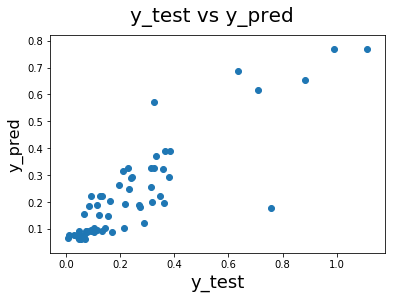

In [90]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

In [91]:
X_test_new.columns

Index(['const', 'aspiration', 'stroke', 'fwd', 'ohcv', 'audi', 'bmw', 'buick',
       'jaguar', 'porsche', 'saab', 'volvo'],
      dtype='object')

In [92]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.7373986447234497

#### The variables significant the car price is : Carcompany, Stroke, aspiration, engienetype,drivewheel

### the R2 score value is 0.73 i.e 73% of the varience it can explain by the model